### Task1: Evaluating and aggregating COVID-19 confirmed cases to ZCTA from Census Tract

In [1]:
import pandas as pd
import geopandas as gpd
import os
import json
import matplotlib.pyplot as plt

In [115]:
 #function to change current working directory
def change_os(path):                        
    print(os.getcwd())
    os.chdir(path)
    print(os.getcwd())

change_os(r'D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3')

D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3\Mobility_flows
D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3


In [116]:
#Opening the geojson in read mode and converting it into a dictionary and loading into a variable - covid_geojson
try:
    with open('COVID-19_Data_by_Census_Tract_V2.geojson','r') as jsonfile:
        covid_geojson = json.load(jsonfile)
        print(type(covid_geojson))
        
except Exception as e:
    import traceback
    print(traceback.format_exc())

<class 'dict'>


In [117]:
#looping through geojson and extracting information of Census Tracts, Confirmed positive cases, Reported date

covid_data = [] #list to hold the append data from the for loop
counter = 0 #to check number of times the loop executed

for data in covid_geojson['features']: #knowing the data type read into the iterator variable - data
    print(type(data))
    break


#Iterator variable(data) is dictionary. Information is accessed by keys - properties:{GEOID:, 'POS_CUM_CONF', 'Date'}
for data in covid_geojson['features']:
    ct = data['properties']['GEOID']        
    positive = data['properties']['POS_CUM_CONF']
    date = data['properties']['Date']
    
    covid_data.append([ct,positive,date]) #each set is loaded as list into covid_data
     
    counter+=1
    
       
print('Total number of rows of data retrieved>',counter)

<class 'dict'>
Total number of rows of data retrieved> 1393


In [118]:
#covid_data DataFrame of COVID-19 data
covid_data = pd.DataFrame(covid_data, columns=["ct", "positive", "date"])
covid_data.head(5)

,ct,positive,date
0,55087010900,565,2023-02-09T06:00:00Z
1,55087011000,1493,2023-02-09T06:00:00Z
2,55087011101,1286,2023-02-09T06:00:00Z
3,55087011102,2149,2023-02-09T06:00:00Z
4,55087011200,793,2023-02-09T06:00:00Z


In [119]:
#Exporting data to CSV
def fileExists_csv(fileName,df_name):
    if os.path.exists(f'{fileName}.csv'):
        os.remove(f'{fileName}.csv')
        df_name.to_csv(f'{fileName}.csv')
        print(f'{fileName}.csv is re-created')
    else:
        covid_data.to_csv(f'{fileName}.csv')
        print(f'{fileName}.csv is re-created')

fileExists_csv('covid_data',covid_data)

covid_data.csv is re-created


In [120]:
#lambda function and apply method could be used to manipulate data in pandas
covid_data['county']=covid_data['ct'].apply(lambda x: str(x).zfill(11)[:5]) #zfill add 11 zeroes to the left
covid_data.head()

,ct,positive,date,county
0,55087010900,565,2023-02-09T06:00:00Z,55087
1,55087011000,1493,2023-02-09T06:00:00Z,55087
2,55087011101,1286,2023-02-09T06:00:00Z,55087
3,55087011102,2149,2023-02-09T06:00:00Z,55087
4,55087011200,793,2023-02-09T06:00:00Z,55087


In [121]:
#Reading the Dane County Zipcode shapefile (zip) into geopandas DataFrame
zcta_dane = gpd.read_file(r'ZCTAs_DaneCounty.zip')
zcta_dane = zcta_dane.rename({"ZCTA5CE10": "ZCTA5"}, axis=1) #renaming column name to match header in Danecounty_ZCTA shp file
zcta_dane.head()

,ZCTA5,ALAND10,AWATER10,geometry
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078..."
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ..."
2,53911,92481870,819539,"POLYGON ((-89.44271 43.32252, -89.44263 43.337..."
3,53571,1059152,0,"POLYGON ((-89.36308 43.28130, -89.34449 43.281..."
4,53715,3133139,503,"POLYGON ((-89.40899 43.06206, -89.40899 43.070..."


In [122]:
zcta_dane.dtypes #knowing the data types of Zipcode Tabulation Areas

ZCTA5         object
ALAND10        int64
AWATER10       int64
geometry    geometry
dtype: object

Text(0.5, 1.0, 'Zipcodes of Dane County')

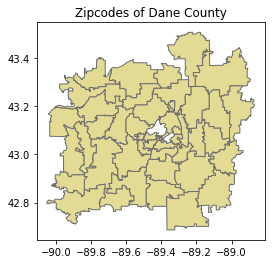

In [123]:
#visualization of zipcodes of Dane county
zcta_dane.plot(color="#E3DA93", edgecolor="#6E6E6E")
plt.title('Zipcodes of Dane County')

In [124]:
# Loading the relationship file between ZCTA and CT using Pandas

zcta_ct_relationship = pd.read_table('zcta_tract_rel_10.txt', sep=',')
print(list(zcta_ct_relationship.columns.values))
zcta_ct_relationship.head()

#zcta_ct_relationship.dtypes #Need to convert ZCTA5, GEOID into string to store zeroes properly

['ZCTA5', 'STATE', 'COUNTY', 'TRACT', 'GEOID', 'POPPT', 'HUPT', 'AREAPT', ' AREALANDPT', 'ZPOP', 'ZHU', 'ZAREA', 'ZAREALAND', 'TRPOP', 'TRHU', 'TRAREA', 'TRAREALAND', 'ZPOPPCT', 'ZHUPCT', 'ZAREAPCT', 'ZAREALANDPCT', 'TRPOPPCT', 'TRHUPCT', 'TRAREAPCT', 'TRAREALANDPCT']


,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,44924558,44833897,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,37782601,37191697,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,44969548,44809680,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,1981101,1981101,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,1380041,1380041,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00


In [125]:
#Splitting census tracts (ct), county from GEOID as string, ZCTA5 is converted to string

zcta_ct_relationship["ct"] = zcta_ct_relationship["GEOID"].apply(lambda x: str(x).zfill(11))
zcta_ct_relationship["county"] = zcta_ct_relationship["GEOID"].apply(lambda x: str(x).zfill(11)[:5])
zcta_ct_relationship["ZCTA5"] = zcta_ct_relationship["ZCTA5"].apply(lambda x: str(x).zfill(5))

zcta_ct_relationship.head()

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,00601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42,72001956300,72001
1,00601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36,72001956400,72001
2,00601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00,72001956500,72001
3,00601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00,72001956600,72001
4,00601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00,72001956700,72001


In [126]:
# Join ZCTA and CT in the Dane County
zcta_ct_relationship_dane = pd.merge(left=zcta_dane, right=zcta_ct_relationship, on='ZCTA5')
zcta_ct_relationship_dane.head()

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.00,0.00,100.00,100.00,0.00,0.00,2.15,2.20,55025003200,55025
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.92,2.45,0.20,0.14,0.95,2.27,0.33,0.23,55021970800,55021
2,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,12900,55025012900,1442,578,...,25.09,23.21,32.93,33.50,38.49,35.14,27.81,27.56,55025012900,55025
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,13100,55025013100,14,6,...,0.24,0.24,0.11,0.12,0.31,0.30,0.18,0.18,55025013100,55025
4,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,111,600,55111000600,974,403,...,16.95,16.18,10.94,11.45,14.81,14.25,10.43,10.47,55111000600,55111


In [127]:
# Assign COVID-19 data to each Census Tract in Dane County
zcta_ct_cases_dane = zcta_ct_relationship_dane.merge(covid_data, on="ct")
zcta_ct_cases_dane.head(1)

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county_x,positive,date,county_y
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,100.0,0.0,0.0,2.15,2.2,55025003200,55025,626,2023-02-09T06:00:00Z,55025


In [128]:
# Compute the weighted confirmed cases
def weighted_cases(row, weight):
    return round((row[weight]/100)*row['positive'])

zcta_ct_cases_dane['pop_weighted_positive'] = zcta_ct_cases_dane.apply(lambda row: weighted_cases(row,'TRPOPPCT'), axis=1)
zcta_ct_cases_dane['area_weighted_positive'] = zcta_ct_cases_dane.apply(lambda row:weighted_cases(row,'TRAREAPCT'), axis=1)

# Compute the weighted confirmed cases at the ZCTA level based on Population weighted cases
zcta_cases_dane = zcta_ct_cases_dane.groupby('ZCTA5').sum()[['pop_weighted_positive','area_weighted_positive']]
zcta_cases_dane_viz = pd.DataFrame(zcta_cases_dane)

In [129]:
zcta_cases_dane_viz = pd.merge(left=zcta_cases_dane_viz, right=zcta_dane, on='ZCTA5')
zcta_cases_dane_viz = gpd.GeoDataFrame(zcta_cases_dane_viz)

In [130]:
zcta_cases_dane_viz.columns.values

array(['ZCTA5', 'pop_weighted_positive', 'area_weighted_positive',
       'ALAND10', 'AWATER10', 'geometry'], dtype=object)

In [131]:
#Exporting the csv of aggregated positive cases at zipcode
zcta_cases_dane.to_csv('ChinnaSubbarayaSiddharth_ZCTA_Positive.csv')

#checking the file in working directory
fileExists_csv('ChinnaSubbarayaSiddharth_ZCTA_Positive',zcta_cases_dane)

ChinnaSubbarayaSiddharth_ZCTA_Positive.csv is re-created


In [132]:
#finding the how related are the positive cases based on population and area weights
correlation = zcta_ct_cases_dane[['pop_weighted_positive','area_weighted_positive']].corr()
correlation

,pop_weighted_positive,area_weighted_positive
pop_weighted_positive,1.000000,0.948393
area_weighted_positive,0.948393,1.000000


There is a strong positive correlation between population weights and area weights as the correlation coefficient ~ 1 (0.95). Therefore, both weighting methodology works. 

#### Visualization of COVID-19 weighted cases per area and population

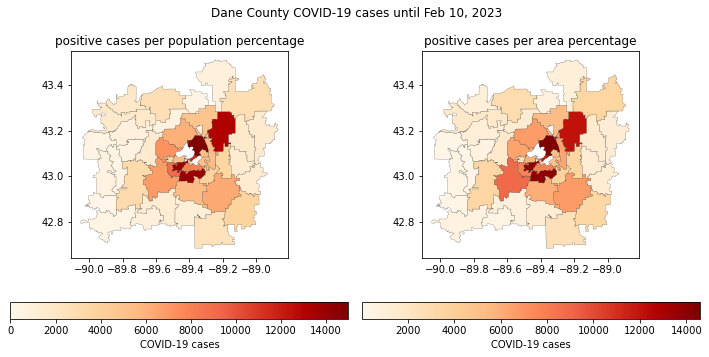

In [99]:
#plotting population weighted cases

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
zcta_cases_dane_viz.plot(column='pop_weighted_positive',cmap = 'OrRd', legend=True,legend_kwds=
                         {'label': "COVID-19 cases",
                        'orientation': "horizontal"}, edgecolor = '#252525', linewidth = 0.2, ax=ax1)
zcta_cases_dane_viz.plot(column='area_weighted_positive',cmap = 'OrRd', legend=True, legend_kwds=
                         {'label': "COVID-19 cases",
                        'orientation': "horizontal"}, edgecolor = '#252525', linewidth = 0.2, ax=ax2)

ax1.set_title('positive cases per population percentage')
ax2.set_title('positive cases per area percentage')

plt.suptitle('Dane County COVID-19 cases until Feb 10, 2023')

plt.tight_layout()
plt.show()

### Task 2: Aggregating ZCTA - ZCTA flow from Human Mobility data (GeoDS Lab)

In [133]:
input_folder = r'D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3\Mobility_flows'
change_os(input_folder)

D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3
D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3\Mobility_flows


In [134]:
import wget

for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_07_05/weekly_ct2ct_2021_07_05_"+str(i)+".csv"
    wget.download(url)

In [135]:
# Merge all flow files for the same week
#Downloaded data from Safegraph mobility data 
#URL: https://github.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/tree/master/weekly_flows/ct2ct/2021_07_05

flow_all = []  #empty list

for file in os.listdir(input_folder): #each file of the folder is looped
    if file[-3:] == "csv":
        flow_df = pd.read_csv(file)
        flow_all.append(flow_df)

flow_data = pd.concat([x for x in flow_all])
flow_data.to_csv("weekly_ct2ct_2021_07_05.csv", index=False)
flow_data.head(1)

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,227,07/05/21 - 07/11/21,74,691.0


In [136]:
flow_data = pd.read_csv('weekly_ct2ct_2021_07_05.csv')

In [137]:
flow_data.dtypes #knowing the data types, even visitor flows is in object

geoid_o                             int64
geoid_d                             int64
lng_o                             float64
lat_o                             float64
lng_d                             float64
lat_d                             float64
number_devices_primary_daytime      int64
date_range                         object
visitor_flows                       int64
pop_flows                         float64
dtype: object

In [138]:
#dropping unneeded columns with drop() method
flow_data = flow_data.drop(columns=['lng_o', 'lat_o','lng_d','lat_d','number_devices_primary_daytime'])
flow_data.head(1) 

,geoid_o,geoid_d,date_range,visitor_flows,pop_flows
0,1001020100,1001020100,07/05/21 - 07/11/21,74,691.0


In [139]:
#type casting origin county and destination geoids to string
flow_data['geoid_o']=flow_data['geoid_o'].apply(lambda x: str(x).zfill(11))
flow_data['geoid_d']=flow_data['geoid_d'].apply(lambda x: str(x).zfill(11))

In [140]:
flow_data.shape

(10550348, 5)

#### Retrieving information of Dane county via zipcode (55025)

In [141]:
#Extracting only the county codes of Dane i.e., 55025 from both origin (geoid_o) and destination (geoid_d) geoids
flow_data_dane = flow_data[(flow_data['geoid_o'].str.startswith('55025')) & (flow_data['geoid_d'].str.startswith('55025'))]
flow_data_dane.head(5)

,geoid_o,geoid_d,date_range,visitor_flows,pop_flows
252251,55025000408,55025002603,07/05/21 - 07/11/21,25,345.0
252252,55025000408,55025000205,07/05/21 - 07/11/21,15,207.0
252253,55025000408,55025000405,07/05/21 - 07/11/21,64,885.0
252254,55025000408,55025010800,07/05/21 - 07/11/21,4,55.0
252255,55025000408,55025010904,07/05/21 - 07/11/21,8,110.0


In [142]:
flow_data_dane.shape, zcta_ct_relationship_dane.shape #checking the shapes of dataframes

((5459, 5), (273, 30))

In [143]:
zcta_ct_relationship_dane.head(1)

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.0,0.0,100.0,100.0,0.0,0.0,2.15,2.2,55025003200,55025


#### Merging by geoid and census tract (ct)

In [144]:
#Merging geoid_o, geoid_d based on census tracts (ct). Just like a VLOOKUP function in MS Excel
flow_data_merge = pd.merge(flow_data_dane, zcta_ct_relationship_dane, left_on='geoid_o', right_on='ct',suffixes=('_o','_d'))
flow_data_merge = pd.merge(flow_data_merge, zcta_ct_relationship_dane, left_on='geoid_d', right_on='ct',suffixes=('_o','_d'))

In [145]:
flow_data_merge.head(1)

,geoid_o,geoid_d,date_range,visitor_flows,pop_flows,ZCTA5_o,ALAND10_o,AWATER10_o,geometry_o,STATE_o,...,ZPOPPCT_d,ZHUPCT_d,ZAREAPCT_d,ZAREALANDPCT_d,TRPOPPCT_d,TRHUPCT_d,TRAREAPCT_d,TRAREALANDPCT_d,ct_d,county_d
0,55025000408,55025002603,07/05/21 - 07/11/21,25,345.0,53711,66077765,8985490,"MULTIPOLYGON (((-89.45921 43.00113, -89.45682 ...",55,...,10.61,9.33,8.95,9.26,89.01,87.86,84.75,84.75,55025002603,55025


In [146]:
flow_data_merge.columns.values #knowing the headers

array(['geoid_o', 'geoid_d', 'date_range', 'visitor_flows', 'pop_flows',
       'ZCTA5_o', 'ALAND10_o', 'AWATER10_o', 'geometry_o', 'STATE_o',
       'COUNTY_o', 'TRACT_o', 'GEOID_o', 'POPPT_o', 'HUPT_o', 'AREAPT_o',
       ' AREALANDPT_o', 'ZPOP_o', 'ZHU_o', 'ZAREA_o', 'ZAREALAND_o',
       'TRPOP_o', 'TRHU_o', 'TRAREA_o', 'TRAREALAND_o', 'ZPOPPCT_o',
       'ZHUPCT_o', 'ZAREAPCT_o', 'ZAREALANDPCT_o', 'TRPOPPCT_o',
       'TRHUPCT_o', 'TRAREAPCT_o', 'TRAREALANDPCT_o', 'ct_o', 'county_o',
       'ZCTA5_d', 'ALAND10_d', 'AWATER10_d', 'geometry_d', 'STATE_d',
       'COUNTY_d', 'TRACT_d', 'GEOID_d', 'POPPT_d', 'HUPT_d', 'AREAPT_d',
       ' AREALANDPT_d', 'ZPOP_d', 'ZHU_d', 'ZAREA_d', 'ZAREALAND_d',
       'TRPOP_d', 'TRHU_d', 'TRAREA_d', 'TRAREALAND_d', 'ZPOPPCT_d',
       'ZHUPCT_d', 'ZAREAPCT_d', 'ZAREALANDPCT_d', 'TRPOPPCT_d',
       'TRHUPCT_d', 'TRAREAPCT_d', 'TRAREALANDPCT_d', 'ct_d', 'county_d'],
      dtype=object)

In [147]:
#using population weights to solve the ct2ct flow through lamda function
def pop_weight(row):
    return row['visitor_flows']*(row['TRPOPPCT_o']/100)*(row['TRPOPPCT_d']/100)

flow_data_merge['pop_wt_visitor_flows'] = flow_data_merge.apply(lambda row: pop_weight(row), axis=1)
flow_data_merge['pop_wt_visitor_flows'] = flow_data_merge['pop_wt_visitor_flows'].apply(lambda x: int(x))

In [148]:
flow_data_merge.head(1)

,geoid_o,geoid_d,date_range,visitor_flows,pop_flows,ZCTA5_o,ALAND10_o,AWATER10_o,geometry_o,STATE_o,...,ZHUPCT_d,ZAREAPCT_d,ZAREALANDPCT_d,TRPOPPCT_d,TRHUPCT_d,TRAREAPCT_d,TRAREALANDPCT_d,ct_d,county_d,pop_wt_visitor_flows
0,55025000408,55025002603,07/05/21 - 07/11/21,25,345.0,53711,66077765,8985490,"MULTIPOLYGON (((-89.45921 43.00113, -89.45682 ...",55,...,9.33,8.95,9.26,89.01,87.86,84.75,84.75,55025002603,55025,13


In [149]:
#Group data by origin and destination zipcodes and sum based on population visitor flows
zcta_dane = flow_data_merge.groupby(['ZCTA5_o','ZCTA5_d']).sum()['pop_wt_visitor_flows']

In [150]:
from datetime import date
today = date.today()
change_os(r'D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3')

zcta_dane.to_csv(f'ChinnaSubbarayaSiddharth_{today}_ZCTA_Flow.csv')

if os.path.exists(f'ChinnaSubbarayaSiddharth_{today}_ZCTA_Flow.csv'):
    print('It is present in the directory')
else:
    print('check for the error')

D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3\Mobility_flows
D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics\Lab3
It is present in the directory
